In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive if your zip file is stored there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os
from PIL import Image

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/FER M 2.zip'

# Extract the images from the zip file
extracted_path = '/content/FER2'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array, array_to_img

# Specify the directory containing the original images
base_dir = '/content/FER2/train'
classes = ['angry', 'fear', 'disgust']

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment images in a given directory
def augment_images(directory, class_name, num_augmented_images):
    class_dir = os.path.join(base_dir, directory, class_name)

    # Load images from the class directory
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.jpg')]
    images = [img_to_array(load_img(img, target_size=(100, 100))) for img in image_files]
    images = np.array(images)

    # Create an iterator for augmented images
    aug_iter = datagen.flow(images, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpg')

    # Generate augmented images
    for i in range(num_augmented_images):
        next(aug_iter)

# Augment images for each minority class
for i in classes:
    if i == 'fear':
        augment_images(base_dir, i, num_augmented_images=500)
    else:
        augment_images(base_dir, i, num_augmented_images=1000)


In [5]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_path = '/content/FER2/train'
test_path = '/content/FER2/test'

def load_images_labels(dataset_path):
    images = []
    labels = []

    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)

        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)

                # Load the image using OpenCV and convert it to grayscale
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Resize the image to a common size (e.g., 28x28 pixels)
                image = cv2.resize(image, (100, 100))

                # Normalize pixel values to the range [0, 1]
                image = image / 255.0

                # Append the image data to the list
                images.append(image)

                # Append the corresponding label to the labels list
                labels.append(class_name)

    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load train and test data
train_images, train_labels = load_images_labels(train_path)
test_images, test_labels = load_images_labels(test_path)

# Shuffle the train and test data (optional)
train_indices = np.random.permutation(len(train_images))
test_indices = np.random.permutation(len(test_images))

train_images = train_images[train_indices]
train_labels = train_labels[train_indices]

test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Encoding labels
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_labels)
test_label_encoded = label_encoder.transform(test_labels)

onehot_encoder = OneHotEncoder(sparse_output=False)
train_label_encoded = train_label_encoded.reshape(-1, 1)
test_label_encoded = test_label_encoded.reshape(-1, 1)

train_onehot_encoded = onehot_encoder.fit_transform(train_label_encoded)
test_onehot_encoded = onehot_encoder.transform(test_label_encoded)

In [ ]:
"""import cv2
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

img_path = '/content/FER/train'

dataset = []
width = 100
height = 100


for directory in os.listdir(img_path):
    path = os.path.join(img_path, directory)

    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (width, height))
        dataset.append([img, directory])

data, labels = zip(*dataset)

data = np.array(data, dtype="float32")
data = data.reshape(data.shape[0], width, height, 1)  # 1 is channel
#data = np.expand_dims(data, axis=0)


#Encoding Labels
labelEncoder = LabelEncoder()
integerEncoded = labelEncoder.fit_transform(labels)
onehotEncoder = OneHotEncoder(sparse=False)
integerEncoded = integerEncoded.reshape(len(integerEncoded), 1)
onehot_encoded = onehotEncoder.fit_transform(integerEncoded)"""

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
"""#Visualizing the images with labels
import matplotlib.pyplot as plt
r = np.random.choice(len(data), 10, replace=False)

for i in r:
  plt.imshow(data[i],cmap='gray')
  plt.title(f'label:{labels[i]}')
  plt.show()"""

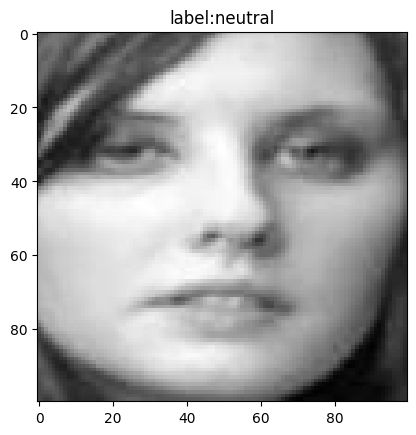

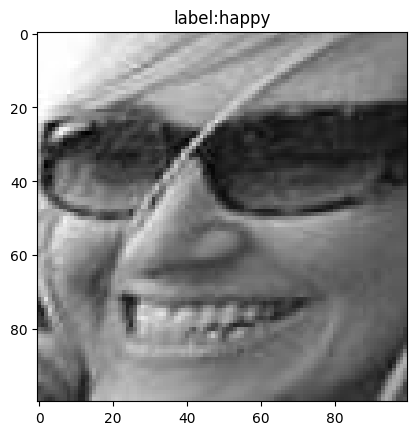

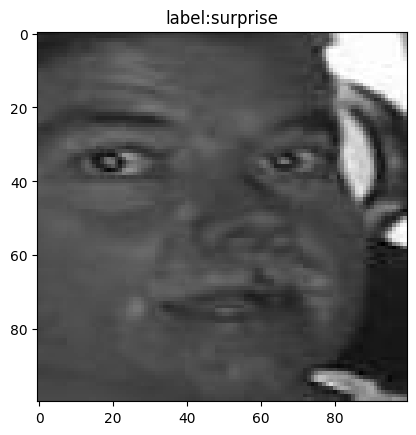

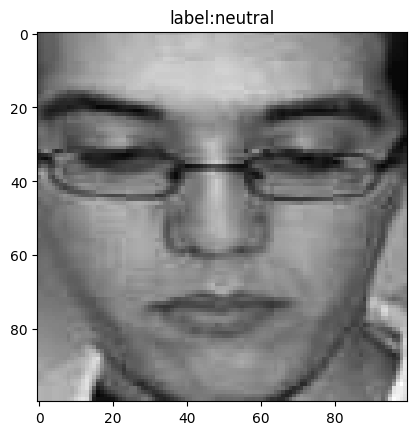

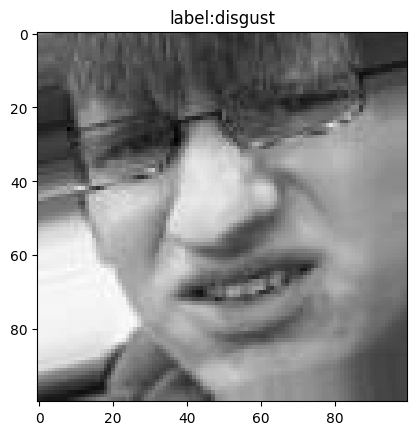

In [6]:
#Visualizing the train images with labels

import matplotlib.pyplot as plt

r1 = np.random.choice(len(train_images), 5, replace=False)

for i in r1:
    plt.imshow(train_images[i],cmap='gray')
    plt.title(f'label:{train_labels[i]}')
    plt.show()

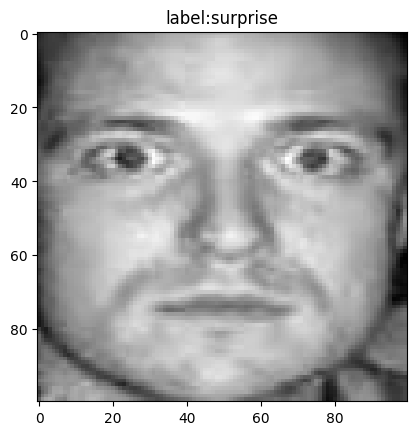

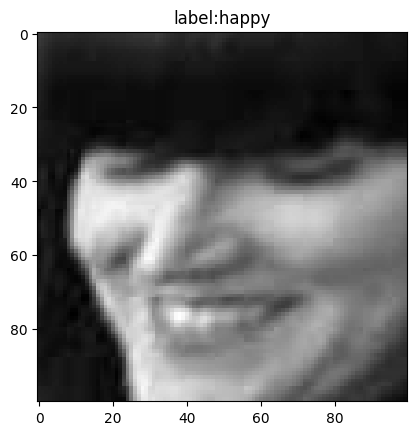

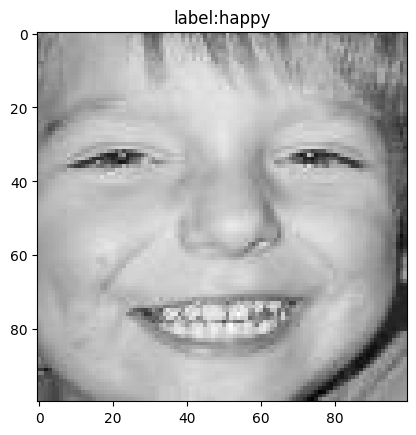

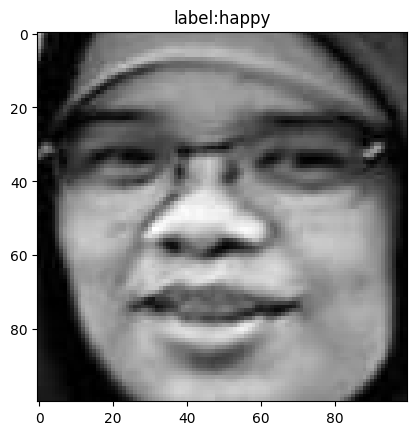

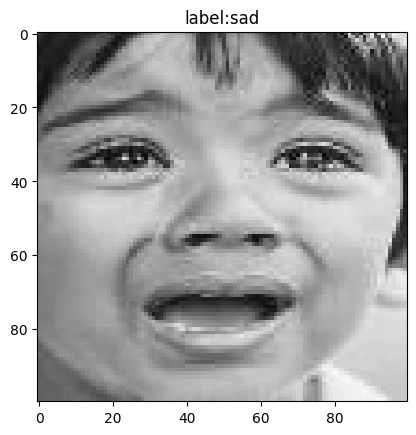

In [7]:
#Visualizing the test images with labels

r2 = np.random.choice(len(test_images), 5, replace=False)

for i in r2:
    plt.imshow(test_images[i],cmap='gray')
    plt.title(f'label:{test_labels[i]}')
    plt.show()

In [ ]:
'''import random

# Dictionary to keep track of the number of images shown per class
num_images_per_class = {label: 0 for label in np.unique(train_labels)}

# Visualize 1 random images from each class
for i in range(len(train_images)):
    label = train_labels[i]

    if num_images_per_class[label] < 1:
        plt.imshow(train_images[i], cmap='gray')
        plt.title(f'Label: {label}')
        plt.show()

        num_images_per_class[label] += 1

    if all(count == 1 for count in num_images_per_class.values()):
        break
'''

"import random\n\n# Dictionary to keep track of the number of images shown per class\nnum_images_per_class = {label: 0 for label in np.unique(train_labels)}\n\n# Visualize 1 random images from each class\nfor i in range(len(train_images)):\n    label = train_labels[i]\n\n    if num_images_per_class[label] < 1:\n        plt.imshow(train_images[i], cmap='gray')\n        plt.title(f'Label: {label}')\n        plt.show()\n\n        num_images_per_class[label] += 1\n\n    if all(count == 1 for count in num_images_per_class.values()):\n        break\n"

In [ ]:
'''# Dictionary to keep track of the number of images shown per class
num_images_per_class = {label: 0 for label in np.unique(test_labels)}

# Visualize 1 random images from each class
for i in range(len(test_images)):
    label = test_labels[i]

    if num_images_per_class[label] < 1:
        plt.imshow(test_images[i], cmap='gray')
        plt.title(f'Label: {label}')
        plt.show()

        num_images_per_class[label] += 1

    if all(count == 1 for count in num_images_per_class.values()):
        break'''

"# Dictionary to keep track of the number of images shown per class\nnum_images_per_class = {label: 0 for label in np.unique(test_labels)}\n\n# Visualize 1 random images from each class\nfor i in range(len(test_images)):\n    label = test_labels[i]\n\n    if num_images_per_class[label] < 1:\n        plt.imshow(test_images[i], cmap='gray')\n        plt.title(f'Label: {label}')\n        plt.show()\n\n        num_images_per_class[label] += 1\n\n    if all(count == 1 for count in num_images_per_class.values()):\n        break"

In [ ]:
"""from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)"""

In [6]:
from sklearn.model_selection import train_test_split

(x_test, x_val, y_test, y_val) = train_test_split(test_images, test_onehot_encoded, test_size=0.2, random_state=42)
print("Train data shape:", x_test.shape)
print("Test data shape:", x_val.shape)
print("Train data shape:", y_test.shape)
print("Test data shape:", y_val.shape)

Train data shape: (1569, 100, 100)
Test data shape: (393, 100, 100)
Train data shape: (1569, 7)
Test data shape: (393, 7)


In [ ]:
"""x_train = np.expand_dims(x_train, axis =-1) #adds a channel dimension to grayscale images in x_train to make them compatible with Tensorflow library
train_datagen = datagen.flow(x_train, y_train, batch_size=64) #for augmenting training data in batches of 64 samples at a time during model training."""

In [ ]:
'''# Generate a batch of augmented images
batch_x, batch_y = train_datagen.next()

# Plot a few examples
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(batch_x[i].reshape(48, 48), cmap='gray')  # Assuming images are grayscale
    ax.set_title(f'Class: {batch_y[i]}')
    ax.axis('off')
plt.show()'''

In [7]:
import numpy as np
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation

In [8]:
# Assuming you have onehot_encoded as your one-hot encoded labels
class_labels = np.argmax(train_onehot_encoded, axis=1)
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(class_labels), y=class_labels)
# Create a dictionary mapping class indices to their corresponding weights
class_weight_dict = dict(enumerate(class_weights))

In [9]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(100, 100, 1), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.02)))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.35))

#model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(140, kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(60))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(7))
model.add(Activation('softmax'))


In [ ]:
"""model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(256,256,1) ,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
#model.add(Conv2D(128, (3, 3),activation='relu',padding='valid'))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

#model.add(Conv2D(128, (3, 3),activation='relu',padding='valid'))
#model.add(Conv2D(384, (3, 3),activation='relu',padding='valid'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('softmax'))"""

In [27]:
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), input_shape=(100, 100, 1), activation='relu', padding='valid'))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(256, (3, 3), activation='relu', padding='valid'))
model1.add(Conv2D(512, (3, 3), activation='relu', padding='valid'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(512, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.01)))
model1.add(Conv2D(784, (3, 3), activation='relu', padding='valid'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Flatten())

model1.add(Dense(512, kernel_regularizer=l2(0.05)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(224, kernel_regularizer=l2(0.01)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.3))

model1.add(Dense(90))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.3))

model1.add(Dense(7))
model1.add(Activation('softmax'))

In [10]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_images, train_onehot_encoded, epochs=20, batch_size=80, validation_data=(x_val, y_val),
                    class_weight=class_weight_dict, callbacks=[reduce_lr, early_stopping])

Epoch 1/20
149/149 [==============================] - 52s 234ms/step - loss: 8.1077 - accuracy: 0.4937 - val_loss: 2.8745 - val_accuracy: 0.3588 - lr: 0.0010
Epoch 2/20
149/149 [==============================] - 28s 188ms/step - loss: 1.6845 - accuracy: 0.6384 - val_loss: 2.7858 - val_accuracy: 0.1908 - lr: 0.0010
Epoch 3/20
149/149 [==============================] - 29s 193ms/step - loss: 1.4255 - accuracy: 0.6819 - val_loss: 1.7743 - val_accuracy: 0.5140 - lr: 0.0010
Epoch 4/20
149/149 [==============================] - 29s 193ms/step - loss: 1.3661 - accuracy: 0.7012 - val_loss: 1.2710 - val_accuracy: 0.7684 - lr: 0.0010
Epoch 5/20
149/149 [==============================] - 28s 190ms/step - loss: 1.3481 - accuracy: 0.7140 - val_loss: 1.3401 - val_accuracy: 0.7074 - lr: 0.0010
Epoch 6/20
149/149 [==============================] - 28s 190ms/step - loss: 1.3039 - accuracy: 0.7289 - val_loss: 1.5071 - val_accuracy: 0.6743 - lr: 0.0010
Epoch 7/20
149/149 [==============================] 

In [11]:
history = model.fit(train_images, train_onehot_encoded, epochs=10, batch_size=120, validation_data=(x_val, y_val),
                    class_weight=class_weight_dict, callbacks=[reduce_lr, early_stopping])

Epoch 1/10
100/100 [==============================] - 38s 311ms/step - loss: 0.9011 - accuracy: 0.8541 - val_loss: 0.8639 - val_accuracy: 0.8295 - lr: 2.0000e-04
Epoch 2/10
100/100 [==============================] - 28s 281ms/step - loss: 0.6262 - accuracy: 0.8849 - val_loss: 0.7389 - val_accuracy: 0.8422 - lr: 2.0000e-04
Epoch 3/10
100/100 [==============================] - 28s 279ms/step - loss: 0.5246 - accuracy: 0.8967 - val_loss: 0.6787 - val_accuracy: 0.8448 - lr: 2.0000e-04
Epoch 4/10
100/100 [==============================] - 28s 279ms/step - loss: 0.4848 - accuracy: 0.9029 - val_loss: 0.6659 - val_accuracy: 0.8473 - lr: 2.0000e-04
Epoch 5/10
100/100 [==============================] - 28s 278ms/step - loss: 0.4761 - accuracy: 0.9087 - val_loss: 0.6774 - val_accuracy: 0.8550 - lr: 2.0000e-04
Epoch 6/10
100/100 [==============================] - 28s 278ms/step - loss: 0.4614 - accuracy: 0.9109 - val_loss: 0.6820 - val_accuracy: 0.8626 - lr: 2.0000e-04
Epoch 7/10
100/100 [========

In [12]:
print('Final training loss ', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss  0.4350094497203827
Final training accuracy  0.919905960559845


In [13]:
testLoss, testAccuracy = model.evaluate(x_test, y_test)

50/50 [==============================] - 2s 20ms/step - loss: 0.6784 - accuracy: 0.8477


In [14]:
print('Testing loss ', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss  0.6784438490867615
Testing accuracy  0.8476736545562744


In [15]:
y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred, axis = 1)

y_true = np.argmax(y_test ,axis = 1)

50/50 [==============================] - 1s 14ms/step


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        84
           1       0.54      0.39      0.45        69
           2       0.66      0.69      0.67        45
           3       0.93      0.94      0.94       566
           4       0.79      0.93      0.85       362
           5       0.84      0.74      0.78       246
           6       0.87      0.83      0.85       197

    accuracy                           0.85      1569
   macro avg       0.78      0.75      0.76      1569
weighted avg       0.85      0.85      0.84      1569



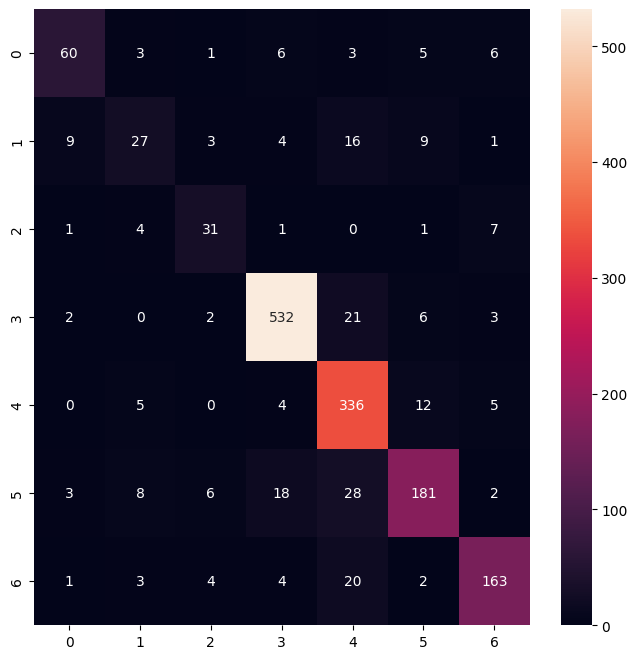

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d");

In [19]:
y_pred_t = model.predict(train_images)

y_pred_t_class = np.argmax(y_pred_t, axis = 1)

y_true_t = np.argmax(train_onehot_encoded ,axis = 1)

373/373 [==============================] - 5s 14ms/step


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_true_t, y_pred_t_class))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1575
           1       0.90      0.93      0.91      1551
           2       0.97      0.96      0.96       758
           3       0.99      0.94      0.97      3696
           4       0.81      0.99      0.89      1866
           5       0.95      0.89      0.92      1423
           6       0.97      0.97      0.97      1042

    accuracy                           0.94     11911
   macro avg       0.94      0.94      0.94     11911
weighted avg       0.94      0.94      0.94     11911



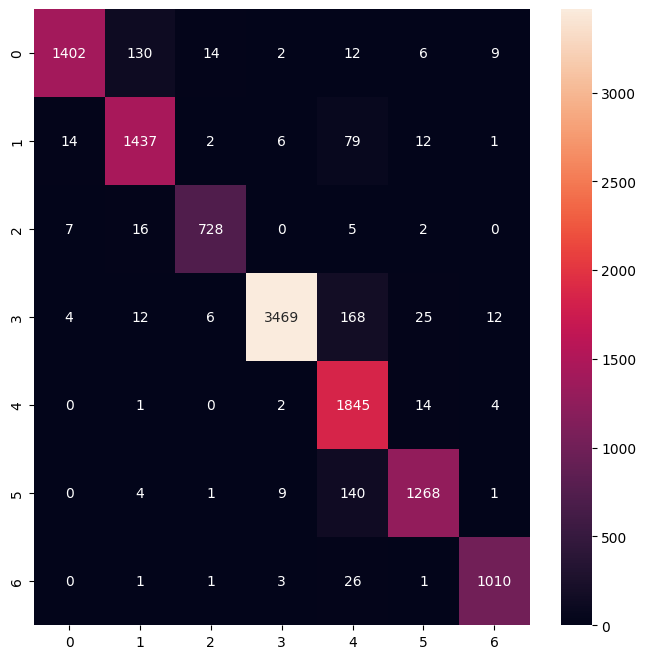

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm1 = confusion_matrix(y_true_t, y_pred_t_class)

plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt="d");